In [10]:
import pandas as pd
import h5py
import os

In [ ]:
{1,2,3}="ASL_Z"
{4,5,6}="ASL_J"
{7,8,9}="ASL_Where"
{10,11,12}="ASL_Store"
{13,14,15}="ASL_Pig"
{16,17,18}="ASL_Past"
{19,20,21}="ASL_Hungary"
{22,23,24}="ASL_Green"
{25,26,27}="ASL_Finish"
{28,29,30}="ASL_Blue"
{31,32,33}="ASL_Bathroom"
{34,35,36}="ASL_Milk"

In [ ]:


path = 'gestureData/'
mat_files = [f for f in os.listdir(path) if f.endswith('.mat')]

labels = []
database = []

for file in mat_files:

    parts = file.split('_')   # ['sub', 'depth', '01', '07.mat']
    user_id = int(parts[2])   # Kullanıcı ID
    
    labels.append(user_id)
    file_paths.append(os.path.join(path, file))


    with h5py.File(f'gestureData/sub_depth_01_01.mat', 'r') as file:
        # print(list(file.keys()))
        depth = file['depth_part'][:]  # Anahtar adı değişebilir

    
    

SyntaxError: invalid syntax (43356405.py, line 2)

In [ ]:
labels = []
file_paths = []

for file in mat_files:
    parts = file.split('_')   # ['sub', 'depth', '01', '07.mat']
    user_id = int(parts[2])   # Kullanıcı ID
    labels.append(user_id)
    file_paths.append(os.path.join(path, file))


In [16]:


with h5py.File('gestureData/sub_depth_01_05.mat', 'r') as file:
    print(list(file.keys()))
    depth = file['depth_part'][:]  # Anahtar adı değişebilir
    print(depth.shape)

['depth_part']
(38, 121, 120)


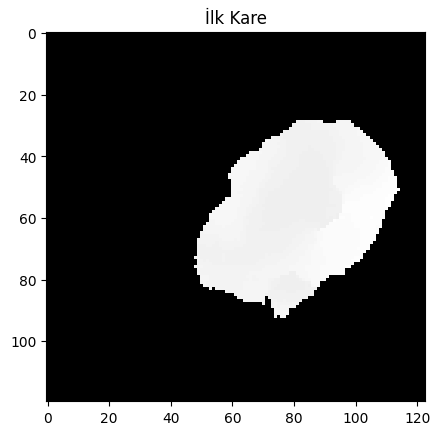

In [39]:
import matplotlib.pyplot as plt

plt.imshow(depth[11], cmap='gray')
plt.title("İlk Kare")
plt.show()

In [ ]:
import cv2
import numpy as np
import h5py
import os

X = []
y = []

for file in os.listdir("gestureData/"):
    if file.endswith(".mat"):
        user_id = int(file.split("_")[2])
        with h5py.File(f"gestureData/{file}", "r") as f:
            key = list(f.keys())[0]  # genellikle 'depth_sequence'
            sequence = f[key][:]  # [frames, height, width]
            
            # Sadece ilk 10 kare, her kareyi 64x64'e yeniden boyutlandır
            # if sequence.shape[0] < 25:
            #     continue
            frames = sequence[:25]
            resized = [cv2.resize(frame, (64, 64)) for frame in frames]
            stacked = np.stack(resized, axis=0)  # [25, 64, 64]

            X.append(stacked)
            y.append(user_id)


In [26]:
X = np.array(X)  # shape: [num_samples, 10, 64, 64]
y = np.array(y)

# CNN için channel ekle (örneğin grayscale için kanal sayısı = 1)
X = X[..., np.newaxis]  # -> [num_samples, 10, 64, 64, 1]


In [ ]:
len(y)

In [ ]:
X.shape

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

num_classes = len(np.unique(y))
y_cat = to_categorical(y - 1)  # kullanıcı ID'leri 1'den başlıyor

model = Sequential([
    Conv3D(32, kernel_size=(3, 3, 3), activation='relu', input_shape=(25, 64, 64, 1)),
    MaxPooling3D(pool_size=(2, 2, 2)),
    Dropout(0.3),
    
    Conv3D(64, kernel_size=(3, 3, 3), activation='relu'),
    MaxPooling3D(pool_size=(2, 2, 2)),
    Dropout(0.3),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv3d_4 (Conv3D)               │ (None, 23, 62, 62, 32) │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_4 (MaxPooling3D)  │ (None, 11, 31, 31, 32) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 11, 31, 31, 32) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_5 (Conv3D)               │ (None, 9, 29, 29, 64)  │        55,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_5 (MaxPooling3D)  │ (None, 4, 14, 14, 64)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 4, 14, 14, 64)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     6,422,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,480,202 (24.72 MB)

 Trainable params: 6,480,202 (24.72 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X, y_cat, epochs=25, batch_size=16, validation_split=0.2)

Epoch 1/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.1124 - loss: 96.6103 - val_accuracy: 0.0606 - val_loss: 2.3259
Epoch 2/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.2054 - loss: 2.1887 - val_accuracy: 0.0000e+00 - val_loss: 2.3268
Epoch 3/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.3332 - loss: 2.1402 - val_accuracy: 0.0303 - val_loss: 2.4082
Epoch 4/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.3228 - loss: 1.9600 - val_accuracy: 0.0303 - val_loss: 2.6805
Epoch 5/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.4996 - loss: 1.4888 - val_accuracy: 0.0758 - val_loss: 2.7867
Epoch 6/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.7119 - loss: 0.9115 - val_accuracy: 0.1515 - val_loss: 3.2436
Epoch 7/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.7424 - loss: 0.7317 - val_accuracy: 0.1364 - val_loss: 3.5289
Epoch 8/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.8775 - loss: 0.3715 - val_accuracy: 0.1364 - val_